In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import json

df_data = pd.read_csv('../data/ogd32_elektrizitaetbilanz_jahreswerte.csv', sep=',', encoding='utf-16')
display(df_data)

,Jahr,Erzeugung_laufwerk_GWh,Erzeugung_speicherwerk_GWh,Erzeugung_kernkraftwerk_GWh,Erzeugung_andere_total_GWh,Erzeugung_andere_fossil_GWh,Erzeugung_andere_erneuerbare_abfaelle_GWh,Erzeugung_holz_GWh,Erzeugung_biogas_GWh,Erzeugung_photovoltaik_GWh,Erzeugung_wind_GWh,Verbrauch_speicherpumpen_GWh,Erzeugung_netto_GWh,Einfuhr_GWh,Ausfuhr_GWh,Landesverbrauch_GWh,Verluste_GWh,Endverbrauch_GWh
0,1960,NaN,NaN,NaN,168,NaN,NaN,NaN,NaN,NaN,NaN,245,20427,1306,3822,17911,2020,15891
1,1961,NaN,NaN,NaN,174,NaN,NaN,NaN,NaN,NaN,NaN,211,21489,1530,4249,18770,2029,16741
2,1962,NaN,NaN,NaN,231,NaN,NaN,NaN,NaN,NaN,NaN,327,21090,3184,4443,19831,2115,17716
3,1963,NaN,NaN,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,358,22445,3419,5119,20745,2262,18483
4,1964,NaN,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,393,22015,4213,4662,21566,2220,19346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,17700.0,22856.0,25280.0,3050,1873.0,1177.0,313.0,372.0,2178.0,146.0,4133,67761,29505,35765,61501,4303,57198
60,2020,17648.0,22968.0,22990.0,2791,1607.0,1184.0,395.0,388.0,2599.0,145.0,4459,65464,26988,32548,59904,4190,55714
61,2021,16962.0,22538.0,18530.0,2320,1207.0,1113.0,475.0,403.0,2842.0,145.0,4145,60070,31532,29119,62483,4370,58113
62,2022,15490.0,18011.0,23113.0,1970,878.0,1092.0,505.0,408.0,3858.0,150.0,5567,57937,33117,29734,61320,4290,57030


In [39]:
df_data_einfuhr_ausfuhr = df_data[['Jahr', 'Einfuhr_GWh', 'Ausfuhr_GWh']]

display(df_data_einfuhr_ausfuhr)

df_data_einfuhr_ausfuhr.rename(columns={'Jahr': 'Year'}, inplace=True)
df_data_einfuhr_ausfuhr.rename(columns={'Einfuhr_GWh': 'Import'}, inplace=True)
df_data_einfuhr_ausfuhr.rename(columns={'Ausfuhr_GWh': 'Export'}, inplace=True)

highcharts_series = []
for column in df_data_einfuhr_ausfuhr.columns:
    series_data = {
        'name': column,
        'data': df_data_einfuhr_ausfuhr[column].fillna(0).tolist()  # Replace NaN with 0 for Highcharts
    }
    highcharts_series.append(series_data) 
    
print(json.dumps(highcharts_series, indent=2))
with open('../public/data/einfuhr_ausfuhr.json', 'w') as json_file:
    json.dump(highcharts_series, json_file, indent=2)

,Jahr,Einfuhr_GWh,Ausfuhr_GWh
0,1960,1306,3822
1,1961,1530,4249
2,1962,3184,4443
3,1963,3419,5119
4,1964,4213,4662
...,...,...,...
59,2019,29505,35765
60,2020,26988,32548
61,2021,31532,29119
62,2022,33117,29734


[
  {
    "name": "Year",
    "data": [
      1960,
      1961,
      1962,
      1963,
      1964,
      1965,
      1966,
      1967,
      1968,
      1969,
      1970,
      1971,
      1972,
      1973,
      1974,
      1975,
      1976,
      1977,
      1978,
      1979,
      1980,
      1981,
      1982,
      1983,
      1984,
      1985,
      1986,
      1987,
      1988,
      1989,
      1990,
      1991,
      1992,
      1993,
      1994,
      1995,
      1996,
      1997,
      1998,
      1999,
      2000,
      2001,
      2002,
      2003,
      2004,
      2005,
      2006,
      2007,
      2008,
      2009,
      2010,
      2011,
      2012,
      2013,
      2014,
      2015,
      2016,
      2017,
      2018,
      2019,
      2020,
      2021,
      2022,
      2023
    ]
  },
  {
    "name": "Import",
    "data": [
      1306,
      1530,
      3184,
      3419,
      4213,
      2843,
      1578,
      2035,
      2357,
      5161,
      3594,
      6873

/var/folders/6c/lvl2r70x0wjcsx9nz61bd2h80000gn/T/ipykernel_53196/3729924681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_einfuhr_ausfuhr.rename(columns={'Jahr': 'Year'}, inplace=True)
/var/folders/6c/lvl2r70x0wjcsx9nz61bd2h80000gn/T/ipykernel_53196/3729924681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_einfuhr_ausfuhr.rename(columns={'Einfuhr_GWh': 'Import'}, inplace=True)
/var/folders/6c/lvl2r70x0wjcsx9nz61bd2h80000gn/T/ipykernel_53196/3729924681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [40]:
df_data_erzeugung = df_data[[
    'Jahr', 
    'Erzeugung_laufwerk_GWh',
    'Erzeugung_speicherwerk_GWh',
    'Erzeugung_kernkraftwerk_GWh',
    'Erzeugung_andere_total_GWh',
    'Erzeugung_andere_fossil_GWh',
    'Erzeugung_andere_erneuerbare_abfaelle_GWh',
    'Erzeugung_holz_GWh',
    'Erzeugung_biogas_GWh',
    'Erzeugung_photovoltaik_GWh',
    'Erzeugung_wind_GWh'
]]

df_data_erzeugung = df_data_erzeugung[df_data['Jahr'] > 1970]

df_data_erzeugung.rename(columns={
    'Jahr': 'Year',
    'Erzeugung_laufwerk_GWh': 'hydropower (run-of-river)',
    'Erzeugung_speicherwerk_GWh': 'hydropower (storage)',
    'Erzeugung_kernkraftwerk_GWh': 'nuclear power',
    'Erzeugung_andere_total_GWh': 'other (total)',
    'Erzeugung_andere_fossil_GWh': 'other (fossil)',
    'Erzeugung_andere_erneuerbare_abfaelle_GWh': 'other (renewable waste)',
    'Erzeugung_holz_GWh': 'wood',
    'Erzeugung_biogas_GWh': 'biogas',
    'Erzeugung_photovoltaik_GWh': 'photovoltaic',
    'Erzeugung_wind_GWh': 'wind'
}, inplace=True)



df_data_erzeugung.head()

,Year,hydropower (run-of-river),hydropower (storage),nuclear power,other (total),other (fossil),other (renewable waste),wood,biogas,photovoltaic,wind
11,1971,11523.0,16040.0,1843.0,2181,NaN,NaN,NaN,NaN,NaN,NaN
12,1972,11218.0,14059.0,4650.0,2371,NaN,NaN,NaN,NaN,NaN,NaN
13,1973,12430.0,16395.0,5896.0,2434,NaN,NaN,NaN,NaN,NaN,NaN
14,1974,13252.0,15311.0,6730.0,2117,NaN,NaN,NaN,NaN,NaN,NaN
15,1975,14039.0,19935.0,7391.0,1629,NaN,NaN,NaN,NaN,NaN,NaN


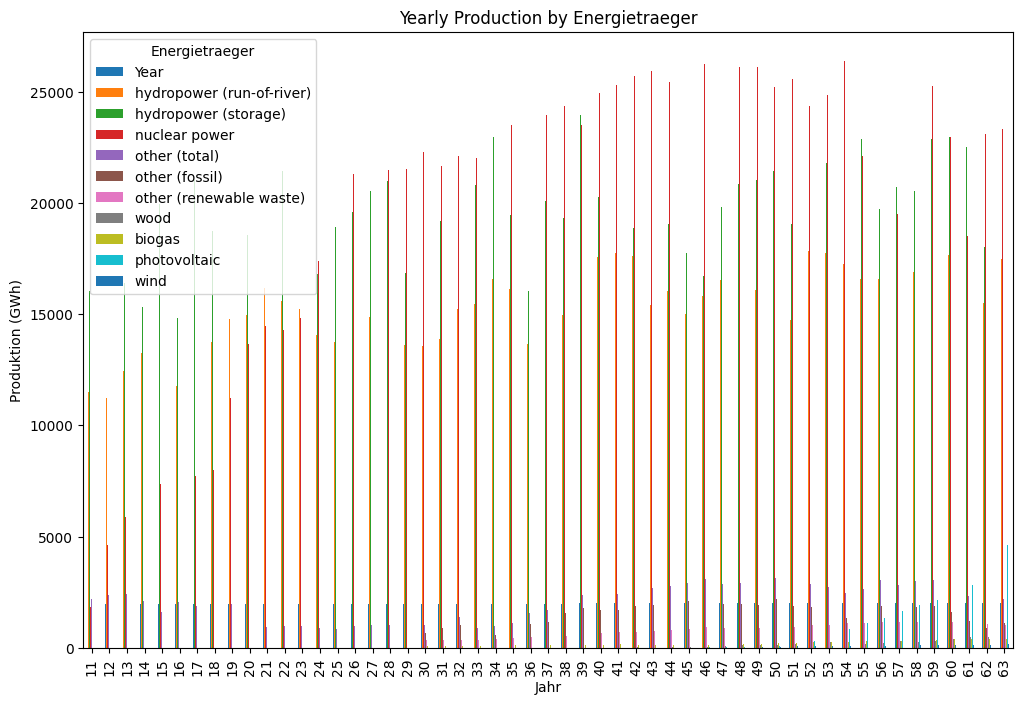

In [41]:
df_data_erzeugung.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Jahr')
plt.ylabel('Produktion (GWh)')
plt.title('Yearly Production by Energietraeger')
plt.legend(title='Energietraeger')
plt.show()

In [42]:
highcharts_series = []
for column in df_data_erzeugung.columns:
    series_data = {
        'name': column,
        'data': df_data_erzeugung[column].fillna(0).tolist()  # Replace NaN with 0 for Highcharts
    }
    highcharts_series.append(series_data)
    
print(json.dumps(highcharts_series, indent=2))
with open('../public/data/erzeugung.json', 'w') as json_file:
    json.dump(highcharts_series, json_file, indent=2)

[
  {
    "name": "Year",
    "data": [
      1971,
      1972,
      1973,
      1974,
      1975,
      1976,
      1977,
      1978,
      1979,
      1980,
      1981,
      1982,
      1983,
      1984,
      1985,
      1986,
      1987,
      1988,
      1989,
      1990,
      1991,
      1992,
      1993,
      1994,
      1995,
      1996,
      1997,
      1998,
      1999,
      2000,
      2001,
      2002,
      2003,
      2004,
      2005,
      2006,
      2007,
      2008,
      2009,
      2010,
      2011,
      2012,
      2013,
      2014,
      2015,
      2016,
      2017,
      2018,
      2019,
      2020,
      2021,
      2022,
      2023
    ]
  },
  {
    "name": "hydropower (run-of-river)",
    "data": [
      11523.0,
      11218.0,
      12430.0,
      13252.0,
      14039.0,
      11790.0,
      15277.0,
      13764.0,
      14803.0,
      14967.0,
      16173.0,
      15617.0,
      15234.0,
      14051.0,
      13765.0,
      14013.0,
      14863.0,
